## Estrategia simple de inversión 

## Estadistica aplicada
### Lizbeth Ramos Saucedo  1885423
### Sesión 13 a 24 de marzo del 2023 




In [1]:
# importamos librerias 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [4]:
#datos 
ticker ='AMZN.MX'

In [5]:
amazon = yf.download(ticker,start='2019-01-01',end='2023-03-17',progress=False)

In [6]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1451.000000,1522.499512,1451.000000,1497.750000,1497.750000,462900
2019-01-03,1507.400024,1507.400024,1472.250000,1474.000000,1474.000000,143880
2019-01-04,1500.449951,1541.362549,1496.500000,1527.000000,1527.000000,43580
2019-01-07,1550.000000,1581.000000,1539.500000,1578.361450,1578.361450,66960
2019-01-08,1612.531006,1612.531006,1570.910034,1605.208984,1605.208984,127960


In [7]:
amazon= amazon[['Adj Close']]

In [8]:
amazon= amazon.rename(columns={'Adj Close':'precio_cierre'})

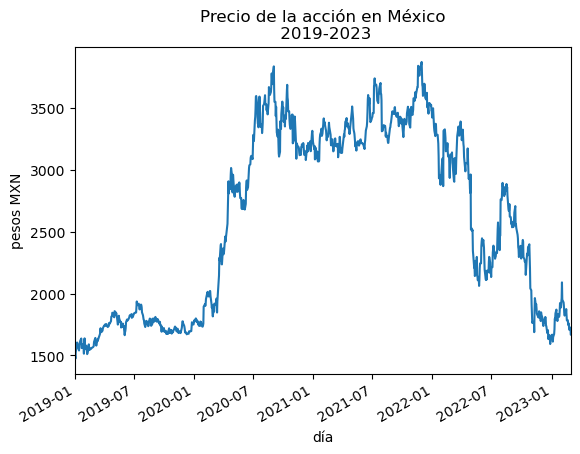

In [9]:
amazon['precio_cierre'].plot()
plt.title('Precio de la acción en México\n 2019-2023')
plt.ylabel('pesos MXN')
plt.xlim('2019-01-01', '2023-03-01')
plt.xlabel ('día')
plt.show()

In [10]:
## calcular promedios móviles MA
amazon['MA-10']= amazon['precio_cierre'].rolling(window=10).mean()
amazon['MA-60']=amazon['precio_cierre'].rolling(window=60).mean()

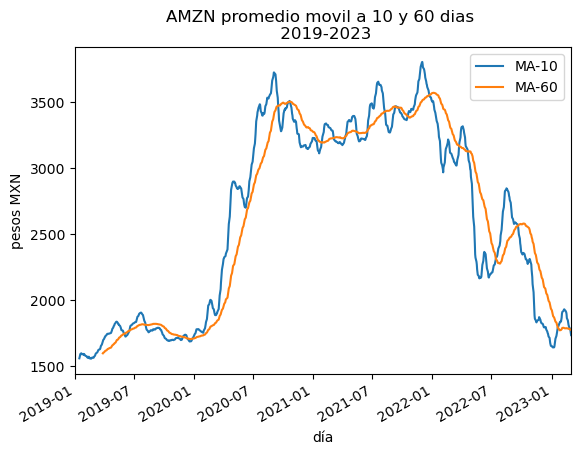

In [11]:
amazon[['MA-10', 'MA-60']].plot()
plt.title('AMZN promedio movil a 10 y 60 dias \n 2019-2023')
plt.ylabel('pesos MXN')
plt.xlim('2019-01-01', '2023-03-01')
plt.xlabel ('día')
plt.show()

In [12]:
amazon['MA-10>MA-60']=amazon ['MA-10']>amazon ['MA-60']

In [13]:
amazon.tail()

,precio_cierre,MA-10,MA-60,MA-10>MA-60
Date,,,,
2023-03-10,1673.250000,1692.439001,1763.292340,False
2023-03-13,1752.089966,1695.770996,1763.516840,False
2023-03-14,1754.829956,1698.653992,1764.740171,False
2023-03-15,1826.000000,1714.455994,1767.101005,False
2023-03-16,1870.920044,1734.613000,1769.870506,False


In [14]:
#señal 
#crear una columna adicional que indique si se debe comprar o vender la accion
amazon['Signal']=0
amazon.loc[amazon['MA-10>MA-60'], 'Signal']=1 #comprar/mantener 
amazon.loc[~amazon['MA-10>MA-60'], 'Signal']=-1 #vender/no comprar la accion 

## Rendimiento/retorno de una acción 
$r_t = \frac{P_t - p_{t-1}}{p_{t-1}} $

In [31]:
amazon['return']=amazon['precio_cierre'].pct_change()

In [32]:
amazon 

,precio_cierre,MA-10,MA-60,MA-10>MA-60,Signal,return
Date,,,,,,
2019-01-02,1497.750000,NaN,NaN,False,-1,NaN
2019-01-03,1474.000000,NaN,NaN,False,-1,-0.015857
2019-01-04,1527.000000,NaN,NaN,False,-1,0.035957
2019-01-07,1578.361450,NaN,NaN,False,-1,0.033636
2019-01-08,1605.208984,NaN,NaN,False,-1,0.017010
...,...,...,...,...,...,...
2023-03-10,1673.250000,1692.439001,1763.292340,False,-1,-0.012791
2023-03-13,1752.089966,1695.770996,1763.516840,False,-1,0.047118
2023-03-14,1754.829956,1698.653992,1764.740171,False,-1,0.001564


In [33]:
#retorno de todo el periodo
amazon['return'].cumsum


<bound method NDFrame._add_numeric_operations.<locals>.cumsum of Date
2019-01-02         NaN
2019-01-03   -0.015857
2019-01-04    0.035957
2019-01-07    0.033636
2019-01-08    0.017010
                ...   
2023-03-10   -0.012791
2023-03-13    0.047118
2023-03-14    0.001564
2023-03-15    0.040557
2023-03-16    0.024600
Name: return, Length: 1061, dtype: float64>

In [35]:
amazon.query('Signal==-1')['return'].cumsum()

Date
2019-01-02         NaN
2019-01-03   -0.015857
2019-01-04    0.020099
2019-01-07    0.053735
2019-01-08    0.070745
                ...   
2023-03-10   -0.111094
2023-03-13   -0.063976
2023-03-14   -0.062412
2023-03-15   -0.021856
2023-03-16    0.002744
Name: return, Length: 559, dtype: float64